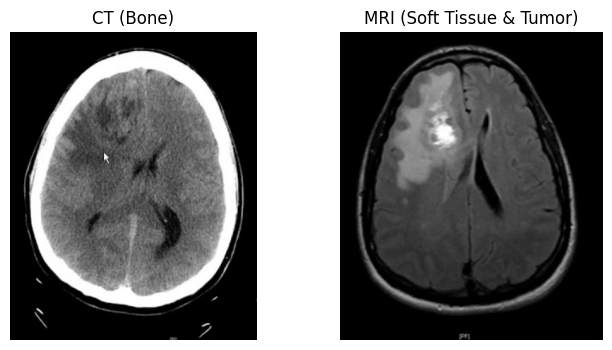

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, color, transform

# Load images
mri_img = io.imread('mri.png', as_gray=True)
ct_img = io.imread('ct.png', as_gray=True)

# Display reference slices
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(ct_img, cmap='gray'); plt.title('CT (Bone)')
plt.axis('off')
plt.subplot(1,2,2); plt.imshow(mri_img, cmap='gray'); plt.title('MRI (Soft Tissue & Tumor)')
plt.axis('off')
plt.show()

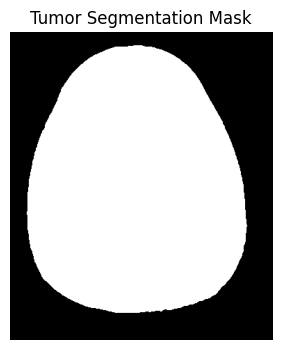

In [9]:
from scipy.ndimage import binary_fill_holes
# Preprocess & segment MRI (Otsu threshold)
mri_smooth = filters.median(mri_img, morphology.disk(2))
mri_norm = (mri_smooth - np.min(mri_smooth)) / (np.max(mri_smooth) - np.min(mri_smooth))
mri_thresh = filters.threshold_otsu(mri_norm)
tumor_mask = mri_norm > mri_thresh
tumor_mask = morphology.remove_small_objects(tumor_mask, min_size=200)
tumor_mask = morphology.binary_closing(tumor_mask, morphology.disk(4))
tumor_mask = binary_fill_holes(tumor_mask)

plt.figure(figsize=(4,4))
plt.imshow(tumor_mask, cmap='gray')
plt.title('Tumor Segmentation Mask')
plt.axis('off')
plt.show()


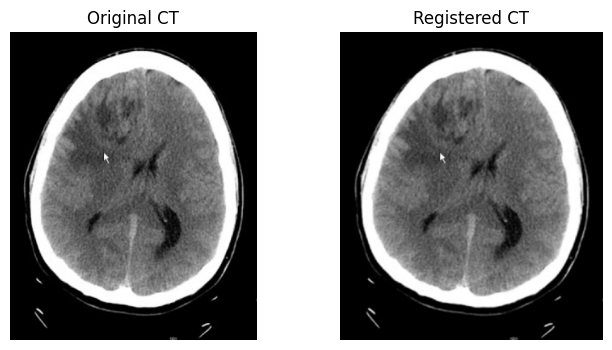

In [10]:
# For demo: images are already aligned, but let's do a small transform
ct_aligned = transform.resize(ct_img, mri_img.shape, preserve_range=True)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(ct_img, cmap='gray'); plt.title('Original CT')
plt.axis('off')
plt.subplot(1,2,2); plt.imshow(ct_aligned, cmap='gray'); plt.title('Registered CT')
plt.axis('off')
plt.show()


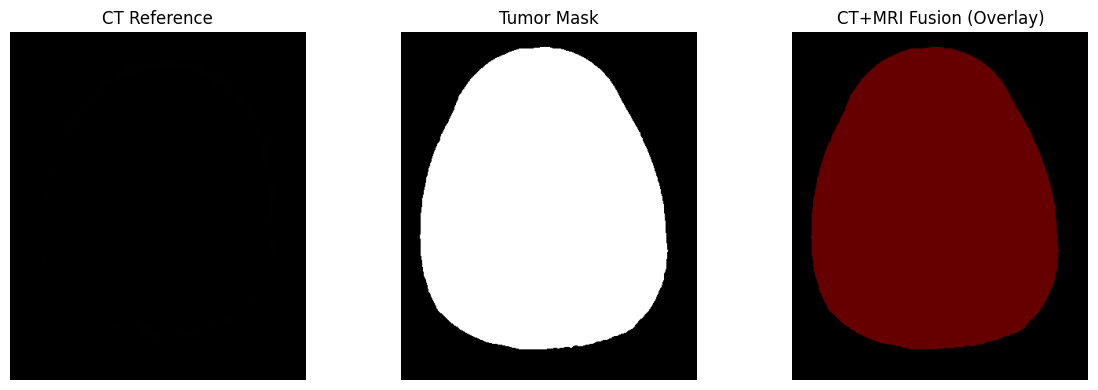

In [11]:
# Convert CT to color
ct_rgb = color.gray2rgb(ct_aligned / 255.0)

# Overlay MRI tumor mask (in red) on CT
ct_overlay = np.copy(ct_rgb)
ct_overlay[tumor_mask] = [1, 0, 0]  # Red tumor region

# Blend with alpha (transparency)
alpha = 0.4
fused = ct_overlay * alpha + ct_rgb * (1 - alpha)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(ct_rgb); plt.title('CT Reference')
plt.axis('off')
plt.subplot(1,3,2); plt.imshow(tumor_mask, cmap='gray'); plt.title('Tumor Mask')
plt.axis('off')
plt.subplot(1,3,3); plt.imshow(fused); plt.title('CT+MRI Fusion (Overlay)')
plt.axis('off')
plt.tight_layout()
plt.show()


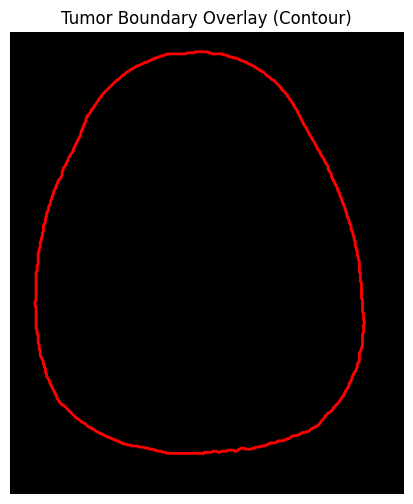

In [12]:
from skimage import measure

plt.figure(figsize=(6,6))
plt.imshow(ct_rgb)
contours = measure.find_contours(tumor_mask, 0.5)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')
plt.title('Tumor Boundary Overlay (Contour)')
plt.axis('off')
plt.show()
